In [1]:
from selenium import webdriver
from konlpy.tag import Okt
from nltk import Text
from matplotlib import font_manager, rc
from wordcloud import WordCloud
 
import matplotlib.pyplot as plt
import time

In [11]:
import pickle

with open('naver_news_content.pk', 'rb') as f:
    news_list = pickle.load(f)

print(news_list[0][2])

   본문 내용     TV플레이어     // TV플레이어     // flash 오류를 우회하기 위한 함수 추가 function _flash_removeCallback() {}    기사내용 요약 "하나 된 아세안, 팬데믹 대응 연대·협력 모범"  "韓, 아세안 친구…아세안과 함께 코로나 극복" [서울=뉴시스] 김진아 기자 = 문재인 대통령이 26일 청와대 충무실에서 열린 제22차 한-아세안 화상 정상회의에서 발언하고 있다. 2021.10.26. bluesoda@newsis.com [서울=뉴시스]김태규 기자 = 문재인 대통령은 26일 "역내포괄적경제동반자협정(RCEP) 비준을 올해 안에 마치고, 오늘 체결한 한·캄보디아 자유무역협정(FTA)과 한·필리핀 FTA도 조속히 발효되도록 최선을 다하겠다"고 밝혔다. 문 대통령은 이날 오후 청와대 본관 충무실에서 화상회의 형태로 참여한 제22차 한·아세안(ASEAN·동남아시아국가연합) 정상회의 모두 발언에서 "한·아세안 공동성명을 통해 사람 중심의 평화와 번영의 공동체를 향한 우리의 한층 강화된 의지를 천명하게 돼 매우 뜻깊다"며 이렇게 말했다. RCEP은 동남아시아국가연합(ASEAN·아세안) 10개국과 한국·중국·일본·호주·인도·뉴질랜드 6개국을 더해 아시아·태평양 지역 16개국 사이의 무역의 룰을 정하는 '메가 FTA'를 뜻한다.미국과 일본 주도로 추진됐다가 유명무실화 된 환태평양경제동반자협정(CPTPP)보다 참여국이 5개국이 많아 '세계 최대 메가 FTA'로 평가 받는다.  인도를 제외한 15개국 정상들은 2019년 11월 제3차 RCEP 정상회의에서 RCEP 협정문을 타결했다. 이후 각국들은 자국내 비준 과정을 통해 조속한 발효를 약속했지만 아직 이뤄지지 않고 있다. 문 대통령은 "우리는 코로나 극복과 더 나은 회복을 위해 더 깊은 우정을 나누어야 한다"며 " 최근 백신 보급률이 낮은 지역을 중심으로 델타변이가 퍼지고, 빈번한 생산 차질로 세계경제 회복이 제약받고 있다"고 진단했다. 그러면서 "백신이 부족한 

In [12]:
type(news_list)

list

In [24]:
content_list=""

for content in news_list:
    content_list = content_list + str(content)


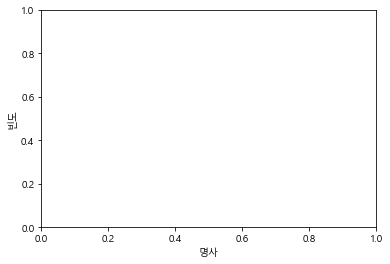

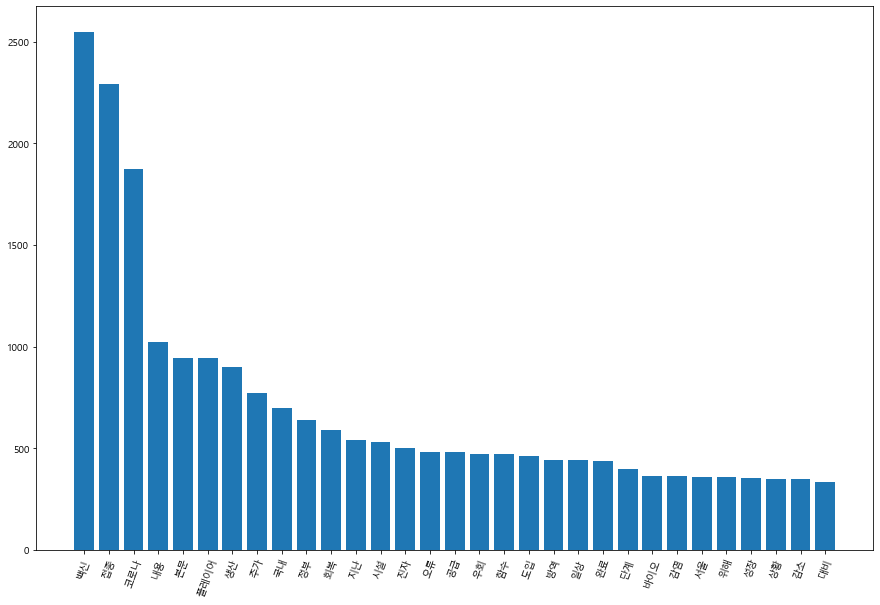

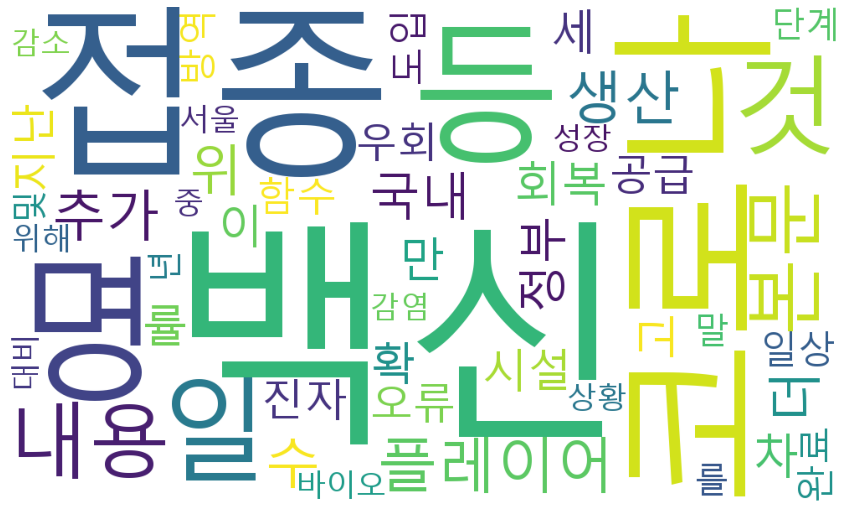

In [26]:
# 트위터에서 만든 소셜 분석을 위한 형태소 분석기 Okt 사용
okt = Okt()
myList = okt.pos(content_list, norm=True, stem=True) # 모든 형태소 추출
myList_filter = [x for x, y in myList if y in ['Noun']] # 추출된 값 중 명사만 추출
 
Okt = Text(myList_filter, name="Okt")
 
# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
 
# 그래프 x, y 라벨 설정
plt.xlabel("명사")
plt.ylabel("빈도")
 
# 그래프에서 x, y 값을 설정
wordInfo = dict()
for tags, counts in Okt.vocab().most_common(50):
    if(len(str(tags)) > 1):
        wordInfo[tags] = counts
 
values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
 
# 그래프 값 설정
plt.figure(figsize=(15,10))
plt.bar(range(len(wordInfo)), values, align='center')
plt.xticks(range(len(wordInfo)), list(keys), rotation='70')
plt.show()
 
 
# wordCloud 출력
plt.figure(figsize=(15,10))
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
plt.axis("off")
plt.show()